In [3]:
%matplotlib nbagg
import numpy as np
import json
import os
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit
from IPython.display import clear_output, display

from alvra_tools.load_data import *
from alvra_tools.channels import *
from alvra_tools import *

In [6]:
scan_name ="Na2S2O3-XAS"
scan_range =".run000895-000932"

#scan_name ="RuFoil_monoscan_defocused_2"
#scan_range =".run000282-000362"


DIR = "/sf/alvra/data/p18387/res/scan_data/" + scan_name + "/"
DIR_json = "/sf/alvra/data/p18387/res/scan_info/"

In [7]:
#json_file = DIR_json + scan_name + "_scan_info.json"
json_file = DIR_json + scan_name + scan_range + ".json"
print (json_file)

with open(json_file) as file:
    data = json.load(file)
numFiles = len(data['scan_files'])
#numFiles = 1

print ("Processing",numFiles,"files")

Signal = []
err_Signal = []

Izero = []
err_Izero = []

Energy_eV = []

for i in range(0,numFiles):
    filename = str(data['scan_files'][i][0])
    print (filename)
    exists = os.path.isfile(filename)
    if exists: # and i !=21:
        clear_output(wait=True)
        print("step", i+1, "of",numFiles, f": Processing {filename}")
        (data_shot, data_fluo_shot, Izero_shot, laser_shot, energy_shot, pulseIDs) = load_FEL_scans(filename, channel_energy)
        
        Signal.append(data_fluo_shot.mean()) #FLUO PIPS
        err_Signal.append(data_fluo_shot.std()/np.sqrt(data_fluo_shot.size)) #FLUO PIPS
                
        Izero.append(Izero_shot.mean())
        err_Izero.append(Izero_shot.std()/np.sqrt(Izero_shot.size))
    
        energy_shot = [x for x in energy_shot if (np.abs(x) > 0)]
        Energy_eV.append(energy_shot[-1])
    #Position_mm.append(position_loop[0])
    
    
Signal = np.asarray(Signal)
err_Signal = np.asarray(err_Signal)

Izero = np.asarray(Izero)
err_Izero = np.asarray(err_Izero)

Energy_eV_readback = load_scan_readback(json_file)
Energy_eV = np.asarray(Energy_eV)
print ("Job done!")

step 38 of 38 : Processing /sf/alvra/data/p18387/raw/scan_data/Na2S2O3-XAS/run_000932.BSREAD.h5
Job done!


In [8]:
#Normalization

#Signal_norm = -Signal / Izero
#err_Signal_norm = err_Signal / Izero

Signal_norm = Izero
err_Signal_norm = err_Izero

<IPython.core.display.Javascript object>


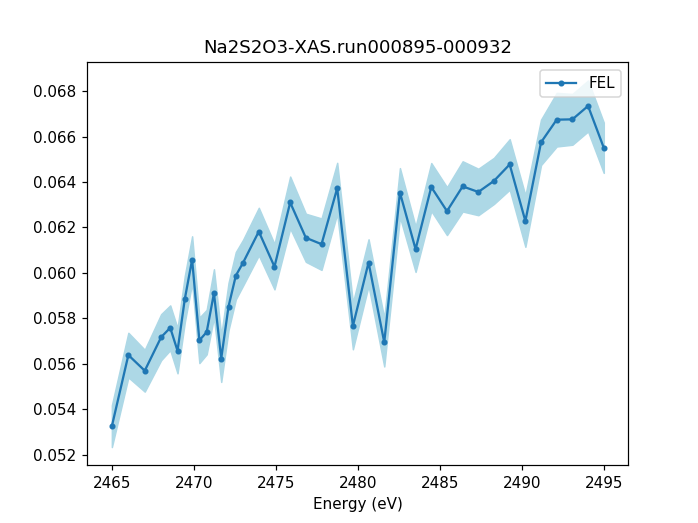

In [11]:
plt.figure()

plt.plot(Energy_eV, Signal_norm, label="FEL",marker='.')
low_err= Signal_norm - err_Signal_norm
high_err= Signal_norm + err_Signal_norm


plt.fill_between(np.squeeze(Energy_eV), low_err, high_err, color='lightblue')
plt.title(scan_name + scan_range)
plt.xlabel("Energy (eV)")
plt.legend(loc="best")


plt.show()
#plt.savefig('Timescan_7_diode')

In [12]:
spectrum_toFit = Signal_norm.copy()
Energy_eV_toFit = np.copy(Energy_eV.ravel())

def gaussian(x, amp, cen, wid):
    return amp * np.exp(-4*(np.log(2))*(x-cen)**2 / wid**2)

# Now fit with error funciton
index = ~(np.isnan(Energy_eV_toFit) | np.isnan(spectrum_toFit))

parameters,extras = curve_fit(gaussian, Energy_eV_toFit[index], spectrum_toFit[index], p0 = [0.3, 2454, 7])
#parameters,extras = curve_fit(errfunc_fwhm, Delay_mm_toFit, Pump_probe_toFit, p0 = [0.01, 0.12, 161, 0.1])

print("Position t0 =",np.round(parameters[1],3),"eV")
print("Width =",np.abs(np.round(parameters[2],3)),"eV")

#best_vals, covar = curve_fit(gaussian, x, y, p0=init_vals)

RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 800.

In [ ]:
plt.figure()

plt.plot(Energy_eV, Signal_norm, label="Width is %s eV" % np.round(parameters[2],3),marker='.')
low_err= Signal_norm - err_Signal_norm
high_err= Signal_norm + err_Signal_norm
plt.fill_between(np.squeeze(Energy_eV), low_err, high_err, color='lightblue')

plt.plot(Energy_eV_toFit, gaussian(Energy_eV_toFit,*parameters))

plt.title(scan_name + scan_range)
plt.grid()
plt.xlabel("Energy (eV)")
plt.legend(loc="best")


plt.show()

In [ ]:
Signal_norm1 = Signal_norm.copy()

In [ ]:
plt.figure()

plt.plot(Energy_eV, Signal_norm_1, label="original",marker='.')
plt.plot(Energy_eV, Signal_norm_3, label="first try",marker='.')
plt.plot(Energy_eV, Signal_norm_2, label="second try",marker='.')

low_err= Signal_norm - err_Signal_norm
high_err= Signal_norm + err_Signal_norm


#plt.fill_between(Energy_eV, low_err, high_err, color='lightblue')
plt.title(DIR)
plt.xlabel("Energy (eV)")
plt.legend(loc="best")


plt.show()
#plt.savefig('Timescan_7_diode')